# Exercises on dynamics

# 1. Free-fall experiment:

We wish to measure the acceleration of gravity based on data from a free-fall experiment in which we drop an object and measure the time it takes for it to reach different distanteces. The object starts from rest.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_1 = pd.read_csv('data_freefall.csv')

time = data_1['Time (s)']
position = data_1["Position (m)"]

In [3]:
data_1

Time (s)  Position (m)
0        0.0           0.0
1        0.5           2.0
2        1.0           5.2
3        1.5           9.8
4        2.0          19.7
5        2.5          31.2
6        3.0          44.4
7        3.5          57.8
8        4.0          80.8
9        4.5         100.4
10       5.0         121.1

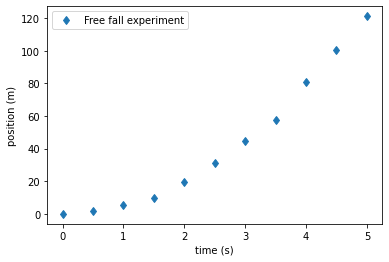

In [4]:
%matplotlib inline

# And now we plot
fig, ax = plt.subplots()

ax.plot(time, position, marker='d', linestyle=" ", label="Free fall experiment")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.legend()
plt.show()

In [5]:
# calculate Pearson's r correlation coeficient
from scipy.stats import spearmanr, pearsonr

p1 = pearsonr(time, position)

print('Pearson r coefficients:', p1)

# calculate Spearman's r correlation coeficient

p = spearmanr(time, position)

print('Spearman values:', p)

Pearson r coefficients: (0.9626893939403707, 2.076326993227384e-06)
Spearman values: SpearmanrResult(correlation=1.0, pvalue=0.0)


In [6]:
# Get coefficients

a, b, c = np.polyfit(time, position, 2)

# Print to check
print('factor or y^2 =', a, ' factor of y=', b, ' constant factor=', c)

# Get fitting function
fit_position = a*time**2 + b*time +c

factor or y^2 = 4.8969696969697  factor of y= -0.0012121212121286383  constant factor= 0.10000000000000825


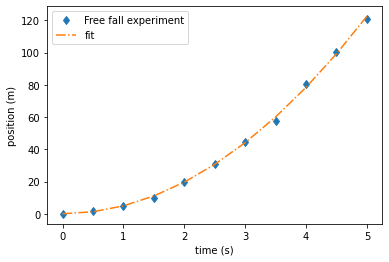

In [7]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(time, position, marker='d', linestyle=" ", label="Free fall experiment")
ax.plot(time, fit_position, linestyle="-.", label="fit")
ax.set_xlabel('time (s)')
ax.set_ylabel('position (m)')
ax.legend()
plt.show()

### Calculate the acceleration of gravity

In [8]:
grav = 2*a

print("g = ", grav, "m/s")

g =  9.7939393939394 m/s


In [9]:
from scipy.optimize import curve_fit

#define a function to fit to the data
def func(x, a):
    return a * x**2 

coef, cova = curve_fit(func, time, position)

print(coef, cova)

print('y = %.5f * t^2' % (coef[0]))

[4.90275925] [[0.00105229]]
y = 4.90276 * t^2


In [10]:
grav2 = 2*coef[0]

print("g = ", grav2, "m/s")

g =  9.805518493681415 m/s


## Linearisation

$y = a\,t^2$

$y = a\,\tau$

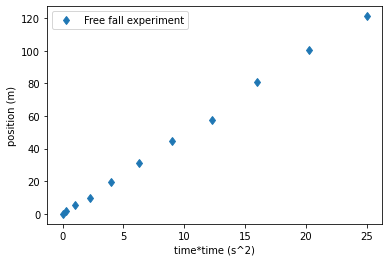

In [11]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(time*time, position, marker='d', linestyle=" ", label="Free fall experiment")
ax.set_xlabel('time*time (s^2)')
ax.set_ylabel('position (m)')
ax.legend()
plt.show()

In [12]:
# Get coefficients

time_sqr = time*time

a, b = np.polyfit(time_sqr, position, 1)

# Print to check
print('slope =', a, ' intercept=', b)

# Get fitting function
fit_position = a*time_sqr + b

slope = 4.896744813627932  intercept= 0.09893742621015894


In [13]:
grav3 = 2*a

print("g = ", grav3, "m/s")

g =  9.793489627255864 m/s


In [14]:
#define a function to fit to the data
def func2(x, a):
    return a * x 

coef2, cova2 = curve_fit(func2, time_sqr, position)

print(coef2, cova2)

print('y = %.5f * t^2' % (coef2[0]))

[4.90275925] [[0.00105229]]
y = 4.90276 * t^2


In [15]:
grav4 = 2*(coef2[0])

print("g = ", grav4, "m/s")

g =  9.805518493681415 m/s


# 2. Pendulum experiment

See a interesting applet here:

https://phet.colorado.edu/sims/html/pendulum-lab/latest/pendulum-lab_en.html

In [16]:
data_2 = pd.read_csv('data_pendulum.csv')

print(data_2)
length = data_2['Length(m)']
period1 = data_2["Period1(s)"]

type(data_2['Length(m)'])

   Length(m)  Period1(s)  Period2(s)  Period3(s)  Period4(s)  Period5(s)
0        0.1        0.53        0.52        0.60        0.65        0.59
1        0.2        0.92        0.91        0.93        0.92        0.89
2        0.3        1.17        1.14        1.15        1.16        1.18
3        0.4        1.27        1.30        1.31        1.27        1.29
4        0.5        1.37        1.36        1.40        1.41        1.42
5        0.6        1.52        1.55        1.56        1.54        1.53
6        0.7        1.66        1.61        1.69        1.67        1.65
7        0.8        1.81        1.79        1.82        1.83        1.83
8        0.9        1.94        1.90        1.92        1.92        1.93
9        1.0        1.99        1.98        2.04        1.95        1.96


pandas.core.series.Series

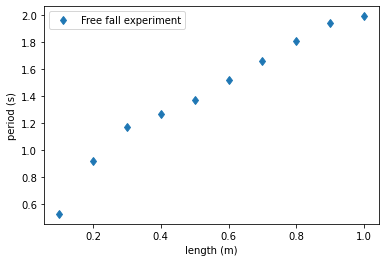

In [17]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(length, period1, marker='d', linestyle=" ", label="Free fall experiment")
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
ax.legend()
plt.show()

In [18]:
# calculate Pearson's r correlation coeficient
from scipy.stats import spearmanr, pearsonr

p1 = pearsonr(length, period1)

print('Pearson r coefficients:', p1)

# calculate Spearman's r correlation coeficient

p = spearmanr(length, period1)

print('Spearman values:', p)

Pearson r coefficients: (0.9790030321565106, 8.291239008601242e-07)
Spearman values: SpearmanrResult(correlation=0.9999999999999999, pvalue=6.646897422032013e-64)


In [19]:
#define a function to fit to the data
def func3(x, a):
    return a * np.sqrt(x)

coef3, cova3 = curve_fit(func3, length, period1)

print(coef3, cova3)

print('T = %.5f * (l)^0.5' % (coef3[0]))

[2.0013507] [[0.00044595]]
T = 2.00135 * (l)^0.5


In [20]:
grav5 = 4*(np.pi**2)/(coef3[0]**2)

print("g = ", grav5, "m/s")

g =  9.856287062748404 m/s


### Linearising

$T = 2\,\pi\,\sqrt{\frac{l}{g}}$

$\Rightarrow T^2 = \frac{4\,\pi^2}{g}\,l$

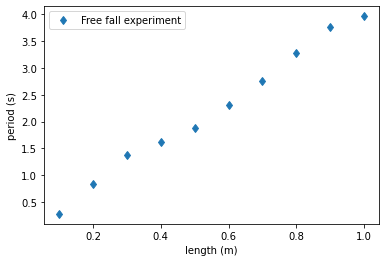

In [21]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(length, period1*period1, marker='d', linestyle=" ", label="Free fall experiment")
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
ax.legend()
plt.show()

In [22]:
#define a function to fit to the data
def func4(x, a):
    return a * x 

coef4, cova4 = curve_fit(func4, length, period1*period1)

print(coef4, cova3)

print('T^2 = %.5f * l' % (coef4[0]))

[4.01948831] [[0.00044595]]
T^2 = 4.01949 * l


In [23]:
grav6 = 4*(np.pi**2)/(coef4[0])

print("g = ", grav6, "m/s")

g =  9.821752059549915 m/s


## Regression using the averages:

In [24]:
period2 = data_2["Period2(s)"]
period3 = data_2["Period3(s)"]
period4 = data_2["Period4(s)"]
period5 = data_2["Period5(s)"]

In [25]:
data_2.iloc[0][1:]

Period1(s)    0.53
Period2(s)    0.52
Period3(s)    0.60
Period4(s)    0.65
Period5(s)    0.59
Name: 0, dtype: float64

In [26]:
mean_period = []
std_period = []

for i in range(len(data_2["Period2(s)"])):
    mean_period.append(np.mean(data_2.iloc[i][1:]))
    std_period.append(np.std(data_2.iloc[i][1:]))
    
print(mean_period)
    
data_2["PeriodMean(s)"] = mean_period
data_2["PeriodStd(s)"] = std_period

print(data_2)

[0.578, 0.914, 1.1599999999999997, 1.288, 1.3920000000000001, 1.5400000000000003, 1.656, 1.816, 1.922, 1.984]
   Length(m)  Period1(s)  Period2(s)  Period3(s)  Period4(s)  Period5(s)  \
0        0.1        0.53        0.52        0.60        0.65        0.59   
1        0.2        0.92        0.91        0.93        0.92        0.89   
2        0.3        1.17        1.14        1.15        1.16        1.18   
3        0.4        1.27        1.30        1.31        1.27        1.29   
4        0.5        1.37        1.36        1.40        1.41        1.42   
5        0.6        1.52        1.55        1.56        1.54        1.53   
6        0.7        1.66        1.61        1.69        1.67        1.65   
7        0.8        1.81        1.79        1.82        1.83        1.83   
8        0.9        1.94        1.90        1.92        1.92        1.93   
9        1.0        1.99        1.98        2.04        1.95        1.96   

   PeriodMean(s)  PeriodStd(s)  
0          0.578    

In [27]:
data_2.to_csv("data_pendulum_new.csv", sep=',', float_format='{:.2e}'.format)

In [28]:
data_3 = pd.read_csv('data_pendulum_new.csv')

print(data_3)
length = data_3['Length(m)']
p_mean = data_3["PeriodMean(s)"]
p_stde = data_3["PeriodStd(s)"]

   Unnamed: 0  Length(m)  Period1(s)  Period2(s)  Period3(s)  Period4(s)  \
0           0        0.1        0.53        0.52        0.60        0.65   
1           1        0.2        0.92        0.91        0.93        0.92   
2           2        0.3        1.17        1.14        1.15        1.16   
3           3        0.4        1.27        1.30        1.31        1.27   
4           4        0.5        1.37        1.36        1.40        1.41   
5           5        0.6        1.52        1.55        1.56        1.54   
6           6        0.7        1.66        1.61        1.69        1.67   
7           7        0.8        1.81        1.79        1.82        1.83   
8           8        0.9        1.94        1.90        1.92        1.92   
9           9        1.0        1.99        1.98        2.04        1.95   

   Period5(s)  PeriodMean(s)  PeriodStd(s)  
0        0.59          0.578        0.0479  
1        0.89          0.914        0.0136  
2        1.18          1.160

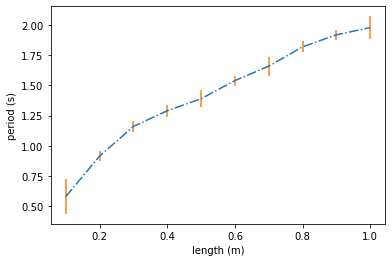

In [29]:
# And now we plot
fig, ax = plt.subplots()

ax.plot(length, p_mean, linestyle="-.", label="Free fall experiment")
ax.errorbar(length, p_mean, yerr = 3*p_stde, linestyle='')
ax.set_xlabel('length (m)')
ax.set_ylabel('period (s)')
#ax.legend()
plt.show()

In [30]:
coef5, cova5 = curve_fit(func3, length, p_mean)

print(coef5, cova5)

print('T = %.5f * (l)^0.5' % (coef5[0]))

[2.00667292] [[0.00021477]]
T = 2.00667 * (l)^0.5


In [31]:
grav7 = 4*(np.pi**2)/(coef5[0]**2)

print("g = ", grav7, "m/s")

g =  9.80407350237291 m/s
